This tutorial is aim to demonstrate how to train ML model and visualization of the result based on *BINOL derived* subset of the database. The generation of descriptor can be checked at tutorial **01-generate_descriptors.ipynb**

# load dependence

In [2]:
import numpy as np
import os
from sklearn.ensemble import ExtraTreesRegressor
from mlutils import train_eval,drawregfig
%matplotlib notebook

# download the preprocessed file

Because of the data size limitation at the GitHub, we store our preprocessed descriptor file in our service. By the way, we provide one descriptor generation method in this service (www.spmsgen.net)

In [3]:
if not os.path.exists('./related_set_1.zip'):
    ! wget http://spmsgen.net:8000/download/related_set_1.zip

In [4]:
# unzip the file that contain descriptor and target
! unzip ./related_set_1.zip
! mv ./related_set_1.npz ./data

Archive:  ./related_set_1.zip
  inflating: related_set_1.npz       


In [5]:
n_jobs = ! cat /proc/cpuinfo | grep "processor" | sort | uniq | wc -l
n_jobs = eval(n_jobs[0])
print('max available CPU thread is: %d, we will use the max thread defaultly'%n_jobs)

max available CPU thread is: 64, we will use the max thread defaultly


In [6]:
demo_set = np.load('./data/related_set_1.npz')
tag_scale = 1
model = ExtraTreesRegressor(n_estimators=100,n_jobs=n_jobs)
train_y,train_pred,test_y,test_pred = train_eval(demo_set,model,tag_scale=tag_scale,example_mode=True)

train set MAE: 0.035, r2_score: 0.977
test set MAE: 0.314, r2_score: 0.785


<IPython.core.display.Javascript object>


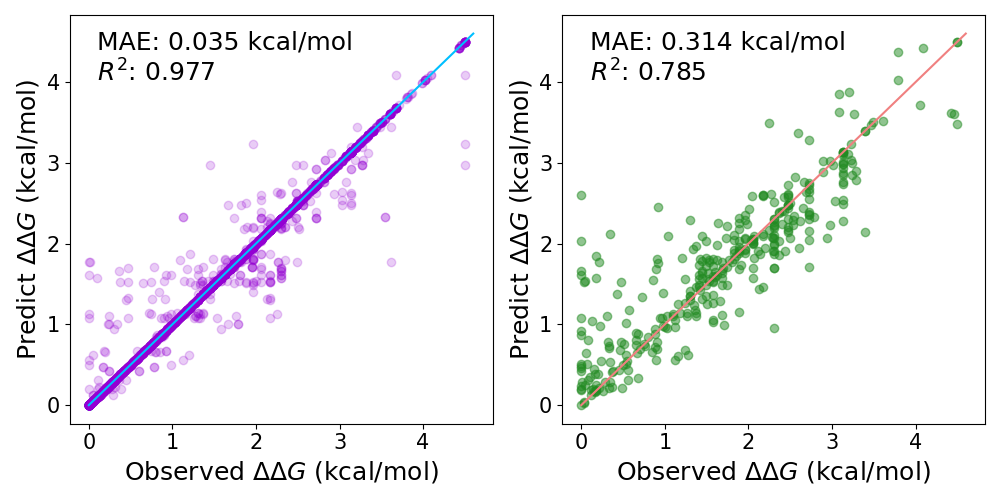

In [7]:
drawregfig(train_y,train_pred,test_y,test_pred,tag_scale,figsave_path=None)